### MNIST

hand written digits dataset consisting 60000 images

images of size 28x28 (784 features) (every pixel is a feature)(28 rows and 28 columns)

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
print(type(mnist))
# bunches and dictionary are same

<class 'sklearn.utils._bunch.Bunch'>


label encoding

    y = ['good', 'bad', 'best', 'worst']
    y = [3, 2, 4, 1]

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

target -> numerical y

categories -> 3 is good, 2 is bad , these types

In [5]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist['data'][0].shape

(784,)

In [7]:
X = mnist['data'] # 28x28 -> 784
y = mnist['target']

In [8]:
y[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

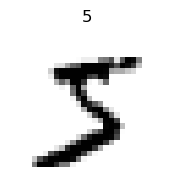

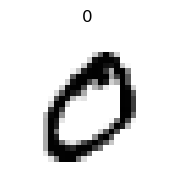

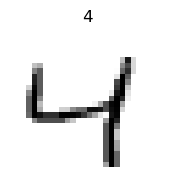

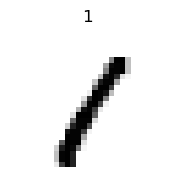

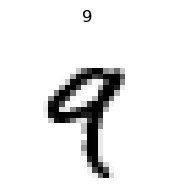

In [10]:
n = 5
for i in range(n):
    im = X[i].reshape(28, 28)
    label = y[i]
    plt.figure(figsize=(3,2))
    plt.imshow(im, cmap='binary')
    plt.axis('off')
    plt.title(label)
    plt.show()

In [11]:
print(mnist['categories'])
# a dictionary

{'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}


In [12]:
print(mnist['feature_names'])
# 784 feature names in each row

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [13]:
print(mnist['target_names'])

['class']


In [14]:
# data -> X
# target -> y

*(1, 2, 3) -> 1, 2, 3

     * -> used for unpacking

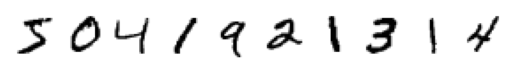

In [15]:
ncols = 10
col_images = [ img.reshape(28, 28) for img in X[:ncols] ]
col_image = np.c_[*col_images]
plt.imshow(col_image, cmap='binary')
plt.axis('off')
plt.show()

In [16]:
def plot_images(images, nrows, ncols=10):
    row_images = []
    col_images = []
    for i in range (1, nrows*ncols):
        if i % ncols == 0:
            col_images.append(images[i].reshape(28, 28))
            row_images.append(np.c_[*col_images])
            col_images = []
        else:
            col_images.append(images[i].reshape(28, 28))

    return np.r_[*row_images]

In [17]:
print(*y[1:101])

0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5


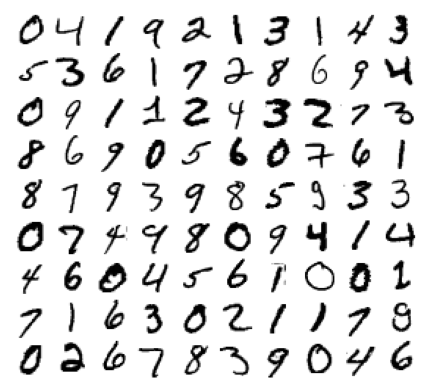

In [18]:
image = plot_images(X, nrows=10, ncols=10)
plt.imshow(image, cmap='binary')
plt.axis('off')
plt.show()

In [19]:
X.shape

(70000, 784)

### Data Pipeline

user image -> remove colors -> reduce dimension 28x28 -> 2D -> m*784 -> scale -> model -> predict

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
print(*y[:100])

5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1


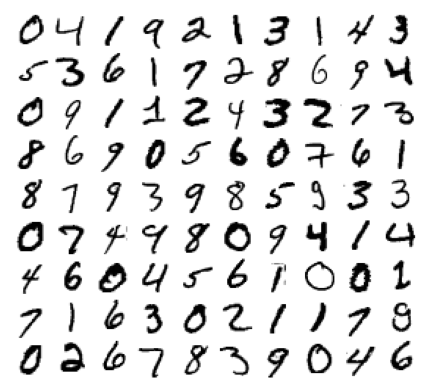

In [22]:
image = plot_images(X_train, 10, 10)
plt.imshow(image, cmap='binary')
plt.axis('off')
plt.show()

## Binary Classification

8 detector

In [24]:
y_train_8 = (y_train == '8').astype(int)

In [26]:
y_test_8 = (y_test == '8').astype(int)

for scaling divide it by 255 or use standard scaler

After scaling

pixel values are not from 0 to 255 now they are between 0 to 1

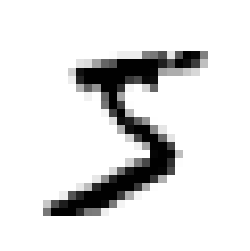

In [32]:
plt.figure(figsize=(3,3))
plt.imshow((X[0]/255).reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

In [33]:
from sklearn.linear_model import SGDClassifier

In [34]:
model = SGDClassifier()

In [35]:
model.fit(X_train, y_train_8)

SGDClassifier()

In [36]:
y_hat_8 = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [39]:
print(confusion_matrix(y_test_8, y_hat_8))

[[8504  522]
 [ 196  778]]


In [40]:
print(confusion_matrix(y_hat_8, y_test_8))

[[8504  196]
 [ 522  778]]


In [41]:
print(classification_report(y_test_8, y_hat_8))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9026
           1       0.60      0.80      0.68       974

    accuracy                           0.93     10000
   macro avg       0.79      0.87      0.82     10000
weighted avg       0.94      0.93      0.93     10000



## Multinomial Classification

In [42]:
from sklearn.datasets import load_iris

In [43]:
iris = load_iris()

In [44]:
iris_X = iris['data']
iris_y = iris['target']

In [45]:
iris_X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [46]:
iris_y[:5]

array([0, 0, 0, 0, 0])

In [47]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [49]:
model = make_pipeline( StandardScaler(), SGDClassifier())

In [51]:
model.fit(iris_X, iris_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [52]:
y_hat = model.predict(iris_X)

In [61]:
print(confusion_matrix(iris_y, y_hat))
# 0 class -> setosa (1st row)
# 1 class -> versicolor (2nd row)
# 2 class -> virginica  (3rd row)

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [62]:
print(*iris['target_names'])

setosa versicolor virginica


In [64]:
47/50

0.94

50 setosa predicted as 50 setosa

out of 50 versicolor flower we correctly classified 47, 3 flowers missclassified as virginica

out of 50 verginica flower we correctly classified 47, 3 flowers missclassified as versicolor

In [63]:
print(classification_report(iris_y, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
X_train[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
y_train[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [68]:
model = SGDClassifier()

In [69]:
model.fit(X_train, y_train)

SGDClassifier()

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
y_hat = model.predict(X_test)

In [72]:
y_hat[:5]

array(['7', '2', '1', '0', '4'], dtype='<U1')

In [73]:
y_test[:5]

array(['7', '2', '1', '0', '4'], dtype=object)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
print(accuracy_score(y_test, y_hat))

0.8636


In [77]:
print(confusion_matrix(y_test, y_hat))

[[ 963    0    0    0    0    1    4    2    8    2]
 [   0 1093    3    0    0    1    4    1   32    1]
 [   7   14  793    6   14    3   18   15  156    6]
 [  10    2   17  587    4  158    8   13  193   18]
 [   6    3    0    1  856    0   21    2   36   57]
 [  17    2    3    4   13  730   19    7   87   10]
 [  16    3    2    1    2   14  902    0   18    0]
 [   5    7    9    1   11    2    1  911   29   52]
 [   6    3    4    2   10    9    6    7  915   12]
 [   8    5    2    1   16    6    0   10   75  886]]


In [78]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.97      0.96      0.96      1135
           2       0.95      0.77      0.85      1032
           3       0.97      0.58      0.73      1010
           4       0.92      0.87      0.90       982
           5       0.79      0.82      0.80       892
           6       0.92      0.94      0.93       958
           7       0.94      0.89      0.91      1028
           8       0.59      0.94      0.73       974
           9       0.85      0.88      0.86      1009

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.89      0.86      0.86     10000



In [79]:
mat = confusion_matrix(y_test, y_hat)

In [83]:
mat.diagonal()

array([ 963, 1093,  793,  587,  856,  730,  902,  911,  915,  886],
      dtype=int64)

In [84]:
np.fill_diagonal(mat, 0)

In [85]:
mat

array([[  0,   0,   0,   0,   0,   1,   4,   2,   8,   2],
       [  0,   0,   3,   0,   0,   1,   4,   1,  32,   1],
       [  7,  14,   0,   6,  14,   3,  18,  15, 156,   6],
       [ 10,   2,  17,   0,   4, 158,   8,  13, 193,  18],
       [  6,   3,   0,   1,   0,   0,  21,   2,  36,  57],
       [ 17,   2,   3,   4,  13,   0,  19,   7,  87,  10],
       [ 16,   3,   2,   1,   2,  14,   0,   0,  18,   0],
       [  5,   7,   9,   1,  11,   2,   1,   0,  29,  52],
       [  6,   3,   4,   2,  10,   9,   6,   7,   0,  12],
       [  8,   5,   2,   1,  16,   6,   0,  10,  75,   0]], dtype=int64)

In [86]:
error = pd.DataFrame(mat)

In [87]:
error.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,4,2,8,2
1,0,0,3,0,0,1,4,1,32,1
2,7,14,0,6,14,3,18,15,156,6
3,10,2,17,0,4,158,8,13,193,18
4,6,3,0,1,0,0,21,2,36,57
5,17,2,3,4,13,0,19,7,87,10
6,16,3,2,1,2,14,0,0,18,0
7,5,7,9,1,11,2,1,0,29,52
8,6,3,4,2,10,9,6,7,0,12
9,8,5,2,1,16,6,0,10,75,0
